<a href="https://colab.research.google.com/github/Devan5622/Devan5622/blob/main/Resnet50%3D67.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Alzheimer-Dataset/train'
valid_path = '/content/drive/MyDrive/Alzheimer-Dataset/test'

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Alzheimer-Dataset/train/*')
# our layers - you can add more if you want
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [7]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Alzheimer-Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size =10,
                                                 class_mode = 'categorical')

Found 5121 images belonging to 4 classes.


In [11]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Alzheimer-Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 1279 images belonging to 4 classes.


In [12]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
513/513 [==============================] - 1387s 3s/step - loss: 2.2898 - accuracy: 0.4581 - val_loss: 1.7406 - val_accuracy: 0.5059
Epoch 2/100
513/513 [==============================] - 79s 153ms/step - loss: 2.0316 - accuracy: 0.5124 - val_loss: 1.3055 - val_accuracy: 0.5270
Epoch 3/100
513/513 [==============================] - 78s 153ms/step - loss: 1.9309 - accuracy: 0.5087 - val_loss: 1.4101 - val_accuracy: 0.5231
Epoch 4/100
513/513 [==============================] - 76s 149ms/step - loss: 1.8865 - accuracy: 0.5226 - val_loss: 3.0026 - val_accuracy: 0.3761
Epoch 5/100
513/513 [==============================] - 75s 147ms/step - loss: 1.8671 - accuracy: 0.5243 - val_loss: 2.4943 - val_accuracy: 0.3675
Epoch 6/100
513/513 [==============================] - 75s 146ms/step - loss: 1.6930 - accuracy: 0.5499 - val_loss: 1.3336 - val_accuracy: 0.5536
Epoch 7/100
513/513 [==============================] - 76s 148ms/step - loss: 1.7948 - accuracy: 0.5477 - val_loss: 1.9030 - 

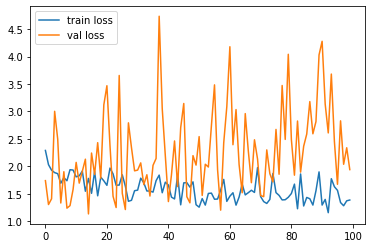

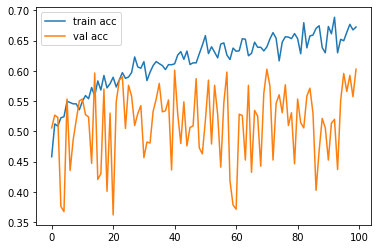

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')